In [1]:
# Import the machine learning libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the MNIST dataset.
# The dataset can be downloaded here: http://yann.lecun.com/exdb/mnist/.
digits = pd.read_csv("./drive/My Drive/ML_Code/MNIST SVM/train.csv")
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### **Data Exploration**

In [3]:
digits.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# 7th row. (row index number is 6).
seven = digits.iloc[6, 1:]
seven.shape

(784,)

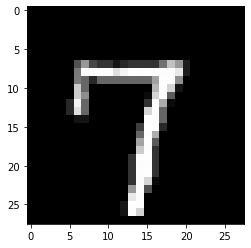

In [5]:
# Plot the single row.
seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap='gray')

In [6]:
# Print the array.
print(seven[:, 5:-5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  82 152  71  51  51  21  41  51  51  51  51 113 193 152  30   0   0]
 [  0 122 253 252 253 252 223 243 253 252 253 252 253 252 233  30   0   0]
 [  0 123 102  41 102 102 102 102 102 102 102 162 254 253 142   0   0   0]
 [  0 203 102   0   0   0   0   0   0   0   0 183 253 212  20   0   0   0]
 [  0 203 142   0   0   0   0   0   0   0  11 213 254  91   0   0   0   0]
 [ 41 243 102   0   0   0   0   0   0   0  51 252 172  10   0   0   0   0]
 [ 41 223 102   0   0   0

In [7]:
# Summarize the counts of 'label' to see how many labels of each digit are present.
digits.label.astype('category').value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [8]:
# Summarize count in percentage.
100*(round(digits.label.astype('category').value_counts()/len(digits.index), 4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

In [9]:
# Try to find the missing values.
digits.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [10]:
# Stats and distribution.
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### **Data Preparation**

In [0]:
# Split a dataset into X and y.
X = digits.iloc[:, 1:]
y = digits.iloc[:, 0]

In [0]:
# Scale the features. Standardize a dataset.
X_scaled = scale(X)

In [13]:
# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29400, 784) (12600, 784) (29400,) (12600,)


### **Linear Support Vector Machine (SVM)**

In [14]:
# SVM model with linear kernel.
%%time
svm_linear = svm.SVC(kernel='linear')

# Fit the model.
svm_linear.fit(X_train, y_train)

CPU times: user 2min 23s, sys: 102 ms, total: 2min 23s
Wall time: 2min 23s


In [15]:
# Predict.
%%time
y_pred = svm_linear.predict(X_test)

CPU times: user 1min 31s, sys: 10.6 ms, total: 1min 31s
Wall time: 1min 31s


In [16]:
y_pred.shape

(12600,)

In [17]:
y_pred

array([3, 6, 9, ..., 1, 6, 5])

In [18]:
y_pred[:10]

array([3, 6, 9, 5, 6, 5, 6, 0, 0, 1])

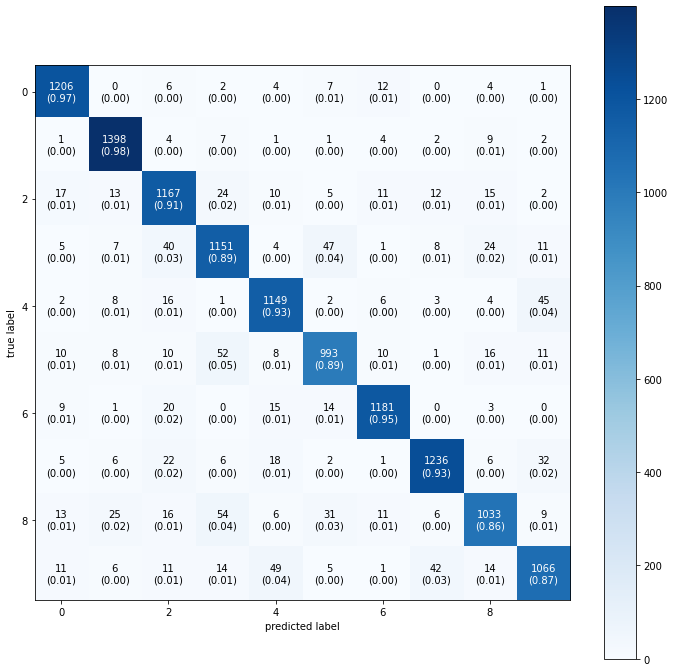

CPU times: user 581 ms, sys: 32 ms, total: 613 ms
Wall time: 618 ms


In [19]:
# Plot the confusion matrix.
%%time
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(12,12))
plt.show()

In [20]:
# Print accuracy.
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

Accuracy: 0.919047619047619 



In [21]:
# Print classification report.
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(class_wise)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1242
           1       0.95      0.98      0.96      1429
           2       0.89      0.91      0.90      1276
           3       0.88      0.89      0.88      1298
           4       0.91      0.93      0.92      1236
           5       0.90      0.89      0.89      1119
           6       0.95      0.95      0.95      1243
           7       0.94      0.93      0.93      1334
           8       0.92      0.86      0.89      1204
           9       0.90      0.87      0.89      1219

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



In [22]:
# Run garbage collection to free up memory.
gc.collect()

9052

### **Non-linear Support Vector Machine (SVM) with Radial Basis Function (RBF) kernel**

In [23]:
# Non-linear regression model using RBF SVM kernel, C=1, default value of gamma.
%%time
non_linear_model = SVC(kernel='rbf')
non_linear_model.fit(X_train, y_train)

CPU times: user 4min 48s, sys: 79.6 ms, total: 4min 48s
Wall time: 4min 49s


In [24]:
# Predict.
%%time
y_pred = non_linear_model.predict(X_test)

CPU times: user 2min 38s, sys: 20.9 ms, total: 2min 38s
Wall time: 2min 38s


In [25]:
# Print accuracy.
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

Accuracy: 0.9573809523809523 



In [26]:
# Run garbage collection to free up memory.
gc.collect()

0

### **Hyperparameter Tuning using Grid Search Cross-Validation**

In [0]:
# Create a KFold object with 10 splits.
%%time
folds = KFold(n_splits=5, shuffle=True, random_state=0)

# Specify range of hyperparameters.
# Set the parameters by cross-validation
hyper_params = {'C':[1, 10, 100], 'gamma': [1e-2, 1e-3, 1e-4]}

# Non-linear regression model using RBF SVM kernel.
svc_grid_search = SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search,
                   param_grid = hyper_params,
                   scoring= 'accuracy',
                   cv = folds,
                   verbose = 1,
                   return_train_score=True)
# Fit the model.
clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [0]:
# Cross-Validation results.
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

In [0]:
# Convert C to numeric type for plotting on x-axis.
%%time
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(18,6))

plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]
plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"], linewidth=2.5)
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"], linewidth=2.5)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma = 0.01")
plt.ylim([0.60, 1])
plt.legend(['Test accuracy', 'Train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"], linewidth=2.5)
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"], linewidth=2.5)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma = 0.001")
plt.ylim([0.60, 1])
plt.legend(['Test accuracy', 'Train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]
plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"], linewidth=2.5)
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"], linewidth=2.5)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma = 0.0001")
plt.ylim([0.60, 1])
plt.legend(['Test accuracy', 'Train accuracy'], loc='upper left')
plt.xscale('log')

plt.show()

In [0]:
# Print the optimal accuracy score and hyperparameters.
%%time
best_score = clf.best_score_
best_hyperparams = clf.best_params_
print("The best accuracy is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

In [0]:
# Run garbage collection to free up memory.
gc.collect()

In [0]:
# Non-linear regression model using RBF SVM kernel with the optimal hyperparameters.
%%time
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print accuracy.
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

In [0]:
# Plot the confusion matrix.
%%time
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(18,18))
plt.show()